# Trabajo Práctico: El Horno

### Integrantes: Berretta Tomás, Bruno Tomás, Ferrari Ignacio, Kinderknetch Mauro

 ## Introducción: 
En este trabajo se busca analizar la forma en la que se enfría un horno partiendo de una temperatura inicial utilizando la ley de enfriamiento de Newton. Se realiza el análisis para 10 tiempos distintos calculando mediante Runge Kutta las temperaturas de cada punto interno del horno en cada instante.

## Descripción de la solución propuesta:
Para resolver el problema comenzamos por convertir el csv con los tiempos iniciales en un arreglo. Una vez obtenido el arreglo se realiza un for para cada uno de los puntos interiores del horno y a su vez se calcula la temperatura del ambiente promediando los puntos vecinos del punto que toca calcular. El calculo de la nueva temperatura se realiza con el método de Runge Kutta de cuarto orden y un incremento de h=0,01. Realizando este procedimiento 10 veces reutilizando los valores obtenidos en cada paso obtenemos las temperaturas del horno en 10 instantes desde un tiempo inicial 0 hasta t=10.

## Comparación de los algoritmos
Solución analítica:

dT/dt = -k(T-Tm)

T = C * exp(-kt) + Tm

In [ ]:
def analitica(x, T, Tm):
    return constant(Tm,T) * math.exp(-0.25*x) + Tm


def constant (Tm, T):
    return T-Tm

with open("temperaturas_horno.csv", 'r') as file3:
    array = np.loadtxt(file3, delimiter=",")

    for i in range(1, len(array[0]) - 1):
        for j in range(1, len(array[i]) - 1):
            ambientT = (array[i - 1][j - 1] + array[i - 1][j] + array[i - 1][j + 1] + array[i][j - 1] +
                        array[i + 1][
                            j - 1] + array[i][j + 1] + array[i + 1][j] + array[i + 1][j + 1]) / 8
            array[i][j] = analitica(1, array[i][j],ambientT)

    with open("tempEnT1Analitica.csv", 'w') as file2:
        csvWriter = csv.writer(file2, delimiter=',')
        csvWriter.writerows(array)

with open("tempEnT1.csv", 'r') as file4:
    array = np.loadtxt(file4, delimiter=",")
    with open("tempEnT1Analitica.csv", 'r') as file5:
        array2 = np.loadtxt(file5, delimiter=",")
        error = array-array2
        print(error)
        with open("ErrorT1.csv", 'w') as file6:
            csvWriter = csv.writer(file6, delimiter=',')
            csvWriter.writerows(error)
            

Se puede ver que en la primer iteración hay poco error al comparar la solución analítica con el metódo de Runge Kutta con h = 0.01.

## Código propuesto en Python

In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt


def dTdt(x, y, Tm):
    return -0.25 * (y - Tm)


def rungeKutta(x0, y0, x, h, Tm):
    n = (int)((x - x0) / h)
    y = y0
    for i in range(1, n + 1):
        k1 = h * dTdt(x0, y, ambientT)
        k2 = h * dTdt(x0 + 0.5 * h, y + 0.5 * k1, ambientT)
        k3 = h * dTdt(x0 + 0.5 * h, y + 0.5 * k2, ambientT)
        k4 = h * dTdt(x0 + h, y + k3, ambientT)
        y = y + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        x0 = x0 + h
    return y


arrayArchivos = ["temperaturas_horno.csv", "tempEnT1.csv", "tempEnT2.csv", "tempEnT3.csv",
                 "tempEnT4.csv", "tempEnT5.csv", "tempEnT6.csv", "tempEnT7.csv",
                 "tempEnT8.csv", "tempEnT9.csv", "tempEnT10.csv"]

for k in range(1, len(arrayArchivos)):

    with open(arrayArchivos[k - 1], 'r') as file:
        array = np.loadtxt(file, delimiter=",")

        for i in range(1, len(array[0]) - 1):
            for j in range(1, len(array[i]) - 1):
                ambientT = (array[i - 1][j - 1] + array[i - 1][j] + array[i - 1][j + 1] + array[i][j - 1] +
                            array[i + 1][
                                j - 1] + array[i][j + 1] + array[i + 1][j] + array[i + 1][j + 1]) / 8
                array[i][j] = rungeKutta(0, array[i][j], 1, 0.01, ambientT)

        with open(arrayArchivos[k], 'w') as file2:
            csvWriter = csv.writer(file2, delimiter=',')
            csvWriter.writerows(array)


## Mapas de Calor

Horno en el tiempo: 0


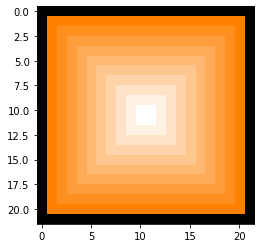

Horno en el tiempo: 1


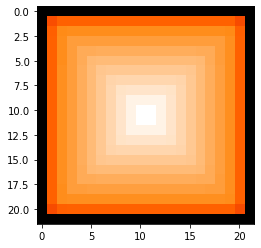

Horno en el tiempo: 2


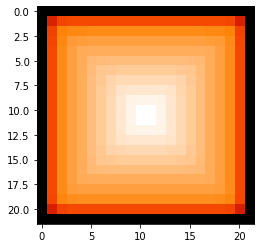

Horno en el tiempo: 3


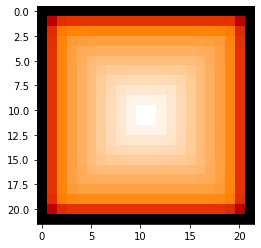

Horno en el tiempo: 4


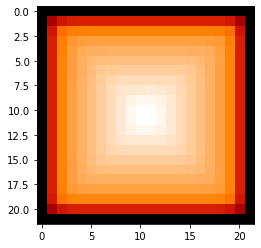

Horno en el tiempo: 5


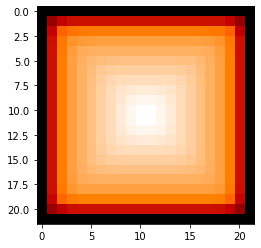

Horno en el tiempo: 6


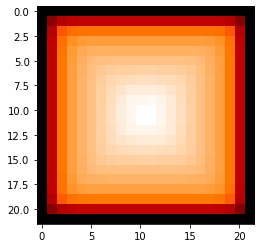

Horno en el tiempo: 7


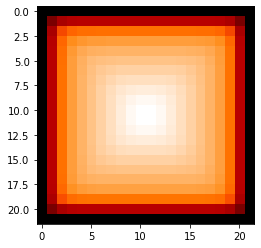

Horno en el tiempo: 8


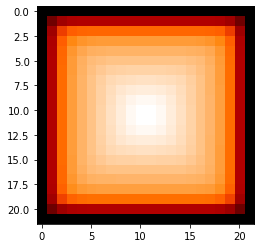

Horno en el tiempo: 9


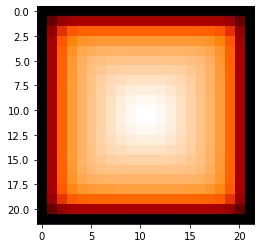

Horno en el tiempo: 10


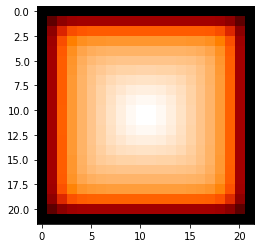

In [10]:
for k in range(0, len(arrayArchivos)):
    with open(arrayArchivos[k], 'r') as file:
        print("Horno en el tiempo: " + str(k))
        array = np.loadtxt(file, delimiter=",")
        plt.imshow(array, cmap='gist_heat')
        plt.show()


## Conclusión
Con los datos obtenidos mediante el algoritmo de Runge Kutta, observamos que el horno se enfria mucho más rápido en las esquinas ya que hay mayor cantidad de puntos en donde la temperatura ambiental es más fría, y el centro tarda una cantidad de tiempo mayor debido a que los datos que obtiene son de temperaturas más calientes.